In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

### From google reviews:

In [2]:
# Load the dataset
df = pd.read_csv("upsgooglereviews_cleaned.csv")
df.rename(columns = {'REVIEWS':'Reviews'}, inplace = True)

df["Source"] = "Google reviews"
df = df[["Reviews", "Source"]]
df = df.dropna()
df.head(3)

,Reviews,Source
0,Daxeshkumar Patel was so very patient and very helpful for doing all our needs to be perfectly done. We are so very thankful to him to finished all our requirements on his store. He was so very kind hearted to connect us to his internet. God bless him to all his work! He was so approachable and smiling with his staff at work. We really appreciate all his kind and good work!!! Keep helping to others sir! We will make sure to came back again and recommend to our friends. God bless sir Daxeshkumar Patel!!! And thank you also to his Manager Khalid Mankal! You are lucky to have them with you in your store!!!,Google reviews
1,"I'm a local author and this store has been here for pretty much all of my personal and professional print needs for the last few years now. While I've never closely compared prices between stores/businesses, the times I have checked the prices have been comparable, while I feel I get a better level of service from the knowledgeable and friendly staff, as well as a better quality product, when I have signs, photos, and business cards made here. I've never had any negative experiences - keep up the great work!",Google reviews
2,I would like to thank Khalid Mankal for all of his time and effort in providing the best service ever. So caring and understanding with three fragile shipments that were taken care of. I would use UPS store #25 managed by Khalid Mankal any time. So efficient . There are not enough words to express my appreciation and gratitude. P. Maxwell.,Google reviews


In [3]:
def preprocess_text(text):
    if isinstance(text, str):
        
        text = text.lower() # Convert to lowercase       
        text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and digits
        
    return text

In [4]:
# Applying preprocessing to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(preprocess_text)

In [5]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [6]:
# Applying TF-IDF vectorization
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Reviews'])

In [7]:
# Performing topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

In [8]:
# Finding dominant topic for each review
dominant_topic = lda_matrix.argmax(axis=1)
df['Topic'] = dominant_topic

In [9]:
# Complaint analysis
negative_reviews = df[df['Sentiment'] < 0]
complaints = negative_reviews[['Reviews','Sentiment']]
complaints.sample(3)

,Reviews,Sentiment
345,i hate the staff here they left a laptop i was shipping on the counter and watched them place a large package right on top of it,-0.4404
347,poor service processing fee for print ridiculous rip off,-0.6808
107,the lady who is working on mar in the early morning shift was extremely rude and does not know how to respect customerimpatient rudewill not visit this location anymore,-0.0498


In [10]:
# Customer service analysis
customer_service_reviews = df[df['Reviews'].str.contains('service', case=False)]

# User experience analysis
waiting_time_reviews = df[df['Reviews'].str.contains('wait', case=False)]
convenience_reviews = df[df['Reviews'].str.contains('convenient', case=False)]
damages_reviews = df[df['Reviews'].str.contains('damage', case=False)]

In [11]:
customer_service_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
7,amazing servicehad my business cards printed within hrs highly recommend,Google reviews,0.7645,0
264,i went to ups at bloor west to get both canadian and irish passport photos they told me that the canadian size was uncommon so they looked up to see the correct size for the irish photos later i discovered on the irish embassy site that it was advised that i use digital photos so i called them to ask if that could be done nabila told me that if i emailed her a picture of the photo on her personal phone so as to be sure that they sent me the right one she would forward that and my email address to iman and he would email the electronic version to me in the morning a few minutes later nabila called me back just after when the store had closed to say that they had found the correct photo and that it would be emailed asap great service thanks,Google reviews,0.8519,0
173,very convenient and all kinds of services,Google reviews,0.0000,0


In [12]:
waiting_time_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
137,rude is an understatement made me wait unnecessarily in an absolutely empty shop and when i asked about service and another delivery pretty much washed their hands and said to call customer service isnt customer service about attending to the customer in front of you apparently not,Google reviews,-0.2247,0
35,today i arrived at this ups location at am on a monday morning after checking the hours posted on their website on their voice messaging service and on their storefront i was extremely disappointed when the store did not open on time i waited until am in a line up with other customers and then gave up and walked over to the belsize location which was actually open as advertisedunprofessional and unreliable,Google reviews,-0.5256,0
10,have a ups return label on my phone they charged me to print the label out to stick it on the box claiming its their paper and their ink apparently the ups store has no way to scan the ups return label and i had to send the label to an ups email address and pay to print it out as a print job this is after waiting around for minutes while this guy works on printing for another customer without even an eye contact acknowledging that me and other groups of people are waiting,Google reviews,-0.5267,0


In [13]:
convenience_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
282,this is a store with a very good customer service nazmus is friendly approachable and knowledgeable making it easy to complete your services i had the pleasure of having nazmus help me out twice so far for printing services related to fedex and amazon he also helped me figure out from the wayfair app how to sendemail them the shipping labels he went above and beyond this location also has amazon dropoff which makes it convenient i would highly recommend this ups store,Google reviews,0.9632,0
383,very convenient place friendly staff,Google reviews,0.5367,0
292,dont listen to the negative reviews they all relate to those who are waiting for deliveries to their door with respect to this actual storei have some much fun coming in to check my mailbox frank is now my friend and everytime i go in i can share a laugh with him i have a personal mailbox in the store the highlights of the service include access with my own set of keys will sign for every package i ship there super convenient being able to not worry about receiving shipments frank et al are wonderful people if you feel like you are receiving bad customer servicethen maybe get out of the house more and improve your social skills,Google reviews,0.9715,0


In [14]:
avg_overall_sent     = df['Sentiment'].mean()
avg_complaint_sent   = complaints['Sentiment'].mean()
avg_customer_sent    = customer_service_reviews['Sentiment'].mean()
avg_wait_sent        =  waiting_time_reviews['Sentiment'].mean()
avg_convenience_sent = convenience_reviews['Sentiment'].mean()
avg_damage_sent      = damages_reviews['Sentiment'].mean()

# Output
print(f"Overall Sentiment: { avg_overall_sent : .4f}")
print(f"Complaints: { avg_complaint_sent : .4f}")
print(f"Customer Service Reviews: { avg_customer_sent : .4f}")
print(f"Waiting Time Reviews: { avg_wait_sent : .4f}")
print(f"Convenience Reviews: { avg_convenience_sent : .4f}")
print(f"Damages Reviews: { avg_damage_sent : .4f}")

Overall Sentiment:  0.3378
Complaints: -0.5917
Customer Service Reviews:  0.4636
Waiting Time Reviews:  0.1481
Convenience Reviews: -0.0337
Damages Reviews:  0.0900


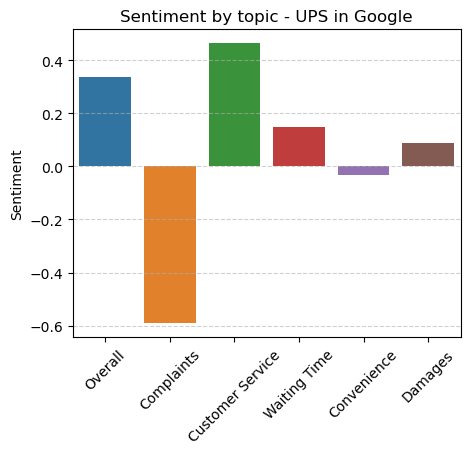

In [15]:
labels = ['Overall', 
          'Complaints', 
          'Customer Service',
          'Waiting Time',
          'Convenience',
          'Damages' 
         ]

data =  [avg_overall_sent, 
         avg_complaint_sent, 
         avg_customer_sent,
         avg_wait_sent,
         avg_convenience_sent,
         avg_damage_sent
         ]

plt.figure(figsize = (5, 4))

sns.barplot(x=labels, y=data)
plt.ylabel('Sentiment')
plt.title('Sentiment by topic - UPS in Google')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [16]:
percentage_positive_rev = df[df['Sentiment'] > 0].shape[0] / df.shape[0] * 100
percentage_neutral_rev = df[df['Sentiment'] == 0].shape[0] / df.shape[0] * 100
percentage_negative_rev = df[df['Sentiment'] < 0].shape[0] / df.shape[0] * 100

print(f"Percentage of positive reviews: {percentage_positive_rev : .2f}%")
print(f"Percentage of neutral reviews: {percentage_neutral_rev : .2f}%")
print(f"Percentage of negative reviews: {percentage_negative_rev : .2f}%")

Percentage of positive reviews:  68.94%
Percentage of neutral reviews:  4.35%
Percentage of negative reviews:  26.71%


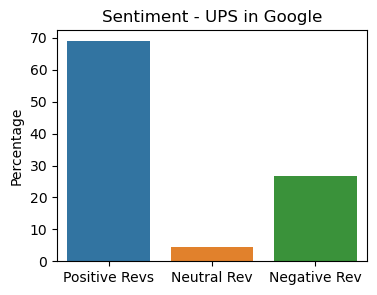

In [17]:
labels = ['Positive Revs', 'Neutral Rev', 'Negative Rev']

data = [percentage_positive_rev, 
        percentage_neutral_rev, 
        percentage_negative_rev]

plt.figure(figsize = (4, 3))

sns.barplot(x=labels, y=data)
plt.ylabel('Percentage')
plt.title('Sentiment - UPS in Google')
plt.show()

In [18]:
# Top 3 best reviews
df.sort_values(by = 'Sentiment', ascending = False).head(3)

,Reviews,Source,Sentiment,Topic
0,daxeshkumar patel was so very patient and very helpful for doing all our needs to be perfectly done we are so very thankful to him to finished all our requirements on his store he was so very kind hearted to connect us to his internet god bless him to all his work he was so approachable and smiling with his staff at work we really appreciate all his kind and good work keep helping to others sir we will make sure to came back again and recommend to our friends god bless sir daxeshkumar patel and thank you also to his manager khalid mankal you are lucky to have them with you in your store,Google reviews,0.9942,0
54,i recently had the pleasure of visiting this ups store branch and i must say it was an outstanding experience this store offers a wide range of shipping and mailbox services making it a onestop destination for all my shipping needsthe convenience of this ups store is unmatched situated in a prime location its easily accessible and has ample parking nearby making it hasslefree to drop off or pick up packages the store itself is wellmaintained clean and organized providing a professional atmosphereone aspect that sets this ups store apart is its exceptional customer service from the moment i walked through the door i was greeted warmly by the knowledgeable and friendly staff they were attentive patient and went above and beyond to address all my inquiries and concerns their expertise in shipping regulations and packaging options was evident ensuring that my package was handled with care and delivered securelymoreover the range of services offered at this ups store is impressive whether you need to ship packages locally or internationally they have various shipping options to suit your needs and budget additionally their mailbox services are convenient for individuals and businesses alike the staff is more than happy to assist in setting up a mailbox and managing incoming mail efficientlyduring my visit i found the store to be wellstocked with a variety of shipping supplies such as boxes tape and packing materials this saved me the hassle of running around searching for these essentials elsewhereoverall my experience at the ups store on dundas st w was exceptional the combination of friendly staff convenient location comprehensive services and attention to detail made it a topnotch establishment for all my shipping and mailbox needs i highly recommend this ups store to anyone seeking reliable efficient and customeroriented shipping services in toronto,Google reviews,0.9918,0
245,i want to take a special moment and thank michelle and karim for everythingive been using ups for over a decade but i struggled to find an independent store that actually cares about its customersive been to other stores and i never had the same excellent customer service but im glad i came to this location and this will be my only toronto ups store location from now oni had to mail out two envelopes one to another province and one to the us the one couriered to the us arrived less than hours and i was happy and shocked that it was delivered within such a short time however the montreal envelope oh boy thats was a crazy bizarre situationthe montreal envelope had legal documents intended for the civil division of the montreal superior court house before i mailed out the documents i confirmed with the civil department law clerks that the address and information on the envelope were correct the clerks informed me that everything was accurate and the department will be expected the envelopewhen i arrived at the ups store to ship it out michelle helped me throughout the whole process and i was able to get the envelope sent out overnight priorityeverything was okay once it left the storethe problem started when the envelope was out for delivery in montreal the next morning delivery was scheduled for am friday well that didnt happen at allfor some reason the montreal ups driver wouldnt deliver the envelope the driver wr

In [19]:
# Top 3 worst reviews
df.sort_values(by = 'Sentiment', ascending = False).tail(3)

,Reviews,Source,Sentiment,Topic
70,as someone that has been in the customer service industry for over a decade the people working at this location lack the basics in customer service theyre rude unprofessional and ungrateful to have customersclients overpriced to say the least considering how much knowledge they lackjust based on my last visit the older man told me to print more copies cause one copy is just a waste of his time not to mention that when they make a mistake they charge or try to charge you for ithands down one of the worst ups store service ive seen receivedfrom the son mom and dad whether its a culture thing or not theyre in the wrong business,Google reviews,-0.9719,0
83,personally i have nothing against the employees here or the owner frank he is a nice guy albeit way too talkative however due to the streak of enormous ineptitude and incompetence resulting in financial loss i feel compelled to leave a negative review frank failed to include the signature required option on a shipment containing approximately usd in cinema equipment leading to a snafu upon that package being left outside of a door in a business park in california luckily the package was recovered a similar incident the year before led to a package being stolen and a hard drive being lost the rd and final straw has been the ongoing disaster of a mismanaged intercompany shipment of equipment to the us for a gig frank demonstrated a complete lack of understanding of the basic fundamentals of cross border shipping and paperwork leading to delayed packages resulting in my team renting equipment on the other side not only that due to his poor paperwork i am being charged duties and am still trying to recover those funds from ups if he spent less time socializing with customers and telling stories and more time focusing on his work then perhaps this location might be usable for any professional or anyone interested in their package arriving properly this is not the place for you,Google reviews,-0.9761,1
251,this location deserves stars i work with fedex often and ive never been treated as horribly as i was here the man who works at this ups location is so rude dismissive unprofessional and miserable to say the least not sure he realizes he works in customer service because he offered none i asked for a specific slip and he ignored me proceeded to give me the wrong one and got angry with me because he gave me the wrong one,Google reviews,-0.9794,0


In [20]:
df_google = df

### From Trustpilot:

In [21]:
# Load the dataset
df = pd.read_csv("ups_reviews_trustpilot_clean.csv")
df["Source"] = "Trustpilot"
df.rename(columns = {'0':'Reviews'}, inplace = True)
df = df.dropna()

df.sample(3)

,Reviews,Source
2676,"I was happy with the service,prompt and in schedule.I like to ask if I am not home what are the procedures? I am asking because I am thinking to buy another one rug.",Trustpilot
3585,"UPS deserves zero stars. It's hard to believe that a company as incompetent as this is still making money.\nA driver came to my address, delivered everyone's packages, except mine. He arbitrarily decided that the name on the package was not my name. He decided to not deliver it. This was a time critical business package of supplies. My package was right there, I was right there in a separate room, the driver was right there, and he couldn't be bothered. Now we have nothing!! I was on the phone immediately. I spent HOURS, the rest of the afternoon, dropping everything to get absolutely nowhere. I dropped everything to deal with it and get that package, only to get continually tired to a call center that did nothing. I could not get a phone number for someone who would contact the driver.\nThis company and its drivers who are smoking weed and not paying attention, just single handedly DESTROYED MY BUSINESS. that means, they destroyed my source of income!\nDo they feel bad? No of course not. As long as their profits keep rising.\nThis company business model is to suck b2b and b2consumer companies in to signing a contract with them, then only permitting customers to select ups for delivery. Nobody who has a choice, nobody who is a consumer, would voluntarily use them. Their retail prices are way too high.\nThe only point of contact for help is a call center in some overseas Asian country, like Bangladesh. They basically don't know anything - they are just receptionists who can do nothing more than the customer can already do, like look up tracking numbers. And they listen to complaints, so customers can vent. It won't go anywhere, but ups prefers it if you complain to their call center than complain in a review.\nWell, the dumb driver just cost my business, and cost the company that sold to me, some money. What do they care if they screw us over??",Trustpilot
3645,Unfortunately I had to give 1 star as no option for minus . This company is vile customer service is crap to the point they put the phone down on me waited all day for delivery and now told they can't deliver and need to reschedule. Took a day off work for this . Never will I entertain UPS again had nothing but issues . Vile company,Trustpilot


In [22]:
# Applying preprocessing to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(preprocess_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Applying TF-IDF vectorization
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Reviews'])

# Performing topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Finding dominant topic for each review
dominant_topic = lda_matrix.argmax(axis=1)
df['Topic'] = dominant_topic

df.sample(3)

,Reviews,Source,Sentiment,Topic
1968,mi experiencia con ups fue la mejor sobrepas mis expectativas envi el paquete que deba mantener el fro y fue entregado antes de la hora programada estoy sper satisfecha con el servicio de ups desde la seorita stefan que me recibi una de las oficinas de ocala fl muy profesional y luego el rastreo y la entrega del paquete en austin texas gracias ups exelente servicio\n\n\nmy experience with ups was the best it exceeded my expectations i sent the package that had to be kept cold and it was delivered before the scheduled time i am super satisfied with the ups service from miss stefan who received me at one of the offices in ocala fl very professional and then the tracking and delivery of the package in austin texas thank you ups excellent service,Trustpilot,0.9477,0
4297,package not arriving on christmas terrible service,Trustpilot,-0.4767,2
20,in the courier service category,Trustpilot,0.0000,2


In [23]:
# Complaint analysis
negative_reviews = df[df['Sentiment'] < 0]
complaints = negative_reviews[['Reviews','Sentiment']]

complaints.sample(3)

,Reviews,Sentiment
4540,tried sending letter with ups failed ups internal security measures prevent the processing of this shipment contact ups on \n\ntried calling ups failed contact hours are from am pm because of covid\n\ntried setting up an account failed sorry were unable to process this request\n\nafter wasting over an hour on this i can conclude ups do not want my business and that i should simply give up and try a competitor,-0.8915
4234,appalling service\n\ni have booked online a collection service the driver shows up outside the allocated timeslot and despite confirmation from the customer service team he fails to return my collection was delayed for up to a week and upon return the driver somehow manages to lose all commercial invoices which i have handdelivered to him the agents on the phone for the most part are completely and utterly useless i have wasted over an hour on the phone with no avail to be pingponged from one agent to the other or to be placed on an endless loop of hold\n\noverall the whole experience and service were disgusting completely apathetic and screamed incompetence definitely to avoid in the future,-0.9802
2089,the ups serving the riverdale ga area is the worst i also dont like that the delivery service never has a solution that doesnt require an automated response the drivers are not held accountable for not delivering packages they will claim to redeliver and never do i wish businesses that work with them start holding drivers accountable its gotten out of hand,-0.7375


In [24]:
# Customer service analysis
customer_service_reviews = df[df['Reviews'].str.contains('service', case=False)]
customer_service_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
2108,generally my experience with ups is positive but like they say it only takes bad experience to ruin it well that happened to me unfortunately i missed a delivery on that required a signature the door tag said they would attempt delivery the next day but delivery never happened does ups not attempt a nd delivery anymore instead i find out the attempted next day delivery was to one of their access points and that delivery was unsuccessful as well so now i get to wait until and hope again that the delivery to this access point is successful like other reviewers have said calling customer service is a waste of time they have zero problem solving skills and all they can do is regurgitate what the tracking info says on their screen which is no different than the tracking info on their app or website that we all have access to so the moral of the storymake darn sure you are home if you are expecting a package that requires a signature otherwisegod speed in getting your package in a timely manner,Trustpilot,-0.2382,2
1155,if i can choose zero stars i would do it\nunreliable service drivers with sticky fingers they scan the package but never deliver it\nthe worst experience ever,Trustpilot,-0.7684,2
2862,am not at all impressed with ups delivery service this time it was left at a neighbours door down the road was lucky last delivery never appeared,Trustpilot,0.0634,2


In [25]:
# User experience analysis
waiting_time_reviews = df[df['Reviews'].str.contains('wait', case=False)]
convenience_reviews = df[df['Reviews'].str.contains('convenient', case=False)]
damages_reviews = df[df['Reviews'].str.contains('damage', case=False)]

waiting_time_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
244,ill wait all day for a ups delivery and suddenly there will be an email saying they attempted delivery really i was home and the doorbell works how could that be hmm no paper notice of a failed delivery no sign at all that the driver actually was here then im told the package will be delivered days later at an access center miles away from me this has happened countless times complained to the manager and got nothing but condescension they are the worst,Trustpilot,-0.9144,2
203,colis jamais reu entrepos dans un dpt ups en allemagne impossible de dbloquer la situation\nen cours de livraison\nvillerslelac the street number is incorrect this may delay delivery were attempting to update the address the package is undeliverable and is in the process of being disposed of according to the local guidelines\n \ngmt\nvillerslelac \n \ngmt\nvillerslelac the street number is incorrect this may delay delivery were attempting to update the address\n \ngmt\nthisethe street number is incorrect this may delay delivery were attempting to update the address\n \ngmt\nthiseout for delivery\n \ngmt\nen cours de ddouanement\nroissy charles de gaulleimport scan\n \ngmt\nyour package has been released by the government agency\n \ngmt\nyour package is on the way\n \ngmt\ndubai airportarrived at facility\n \ngmt\nchek lap kokyour package is in transit were updating plans to schedule your delivery the package will be forwarded to a ups facility in the destination city\n \ngmt\nchek lap kokyour package is in transit were updating plans to schedule your delivery\n \ngmt\nchek lap kokyour package is in transit were updating plans to schedule your delivery the package will be forwarded to a ups facility in the destination city\n \ngmt\nchek lap kokyour package is in transit were updating plans to schedule your delivery\n \ngmt\nthe package is at the clearing agency awaiting final release\n \ngmt\nthe package is at the clearing agency awaiting final release\n \ngmt\nkwai chungdeparted from facility\n \ngmt\nkwai chungorigin scan\n,Trustpilot,-0.6124,0
236,ups have no idea whats going on i had people give me the runaround they said they would help me but all they did was lie to me at the end result im going to have a bad mothers day which my package should of been delivered by wednesday now i have to wait until monday,Trustpilot,-0.6705,2


In [26]:
convenience_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
632,usp used to be okay but since a year or so their service has turn into a joke they continuosly claim that no one is home but theres always someone at home i had no issue whatsoever with any other carrier they then send my package to a random pick up point sometimes far away and incredibly inconvenient to reach businesses should steer clear of this company if you want to provide seamless shopping experiences,Trustpilot,-0.1265,2
2833,i am handicapped but that doesnt mean anything to ups i had pound boxes arriving soon so i told the front desk i want ups to bring my boxes direct to my door but ups refused to do that and they simply dumped the boxes in the lobby ups has no concern for handicapped people or at least the drivers in my area i complained to ups and they said someone would respond but no one ever did respond after plus days now one of those pound boxes i want to return i told ups the box is in front of the door and they need to bring the return label and days later they never show up it is my address on the box but they insist on me bringing the box to the lobby even though i am handicapped a ups driver will do what is most convenient for themit is dissapointing that ups wont help and my box sits in front of my door for days i will try to call the local news since reporting this to ups does nothing,Trustpilot,-0.9450,2
1732,if i could give a zero i would ups is the worst the absolute worst if i could choose not to use them i would in a heartbeat but i cant choose what shipping services sellers use i have had so many expensive parcels lost conveniently never the inexpensive items only things that could fetch a price their customer service is nonexistent and they genuinely dont care they lost an expensive camera and when i asked where it was they said they handed it off but couldnt provide confirmation that it was successfully handed off and when i ask why not i was told that it wasnt their responsibility anymore and to deal with it,Trustpilot,-0.8459,2


In [27]:
damages_reviews.sample()

,Reviews,Source,Sentiment,Topic
3312,horrible service i had an order that was partially delivered in april and i still havent gotten part of my order as well as the stuff i got was damaged i have attempted to file multiple claims but the website wont let me so i have resulted to emailing them multiple times with no response unfortunately i have another order with them and it has been delayed as well i would recommend to steer clear of ups as much as possible because of multiple issues with my orders with no solution or response from them,Trustpilot,-0.1154,2


In [28]:
avg_overall_sent     = df['Sentiment'].mean()
avg_complaint_sent   = complaints['Sentiment'].mean()
avg_customer_sent    = customer_service_reviews['Sentiment'].mean()
avg_wait_sent        =  waiting_time_reviews['Sentiment'].mean()
avg_convenience_sent = convenience_reviews['Sentiment'].mean()
avg_damage_sent      = damages_reviews['Sentiment'].mean()

# Output
print(f"Overall Sentiment: { avg_overall_sent : .4f}")
print(f"Complaints: { avg_complaint_sent : .4f}")
print(f"Customer Service Reviews: { avg_customer_sent : .4f}")
print(f"Waiting Time Reviews: { avg_wait_sent : .4f}")
print(f"Convenience Reviews: { avg_convenience_sent : .4f}")
print(f"Damages Reviews: { avg_damage_sent : .4f}")

Overall Sentiment: -0.3709
Complaints: -0.6644
Customer Service Reviews: -0.4350
Waiting Time Reviews: -0.4182
Convenience Reviews: -0.4317
Damages Reviews: -0.6668


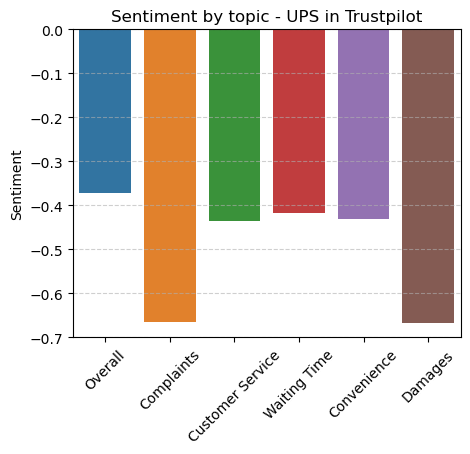

In [29]:
labels = ['Overall', 
          'Complaints', 
          'Customer Service',
          'Waiting Time',
          'Convenience',
          'Damages' 
         ]

data =  [avg_overall_sent, 
         avg_complaint_sent, 
         avg_customer_sent,
         avg_wait_sent,
         avg_convenience_sent,
         avg_damage_sent
         ]

plt.figure(figsize = (5, 4))

sns.barplot(x=labels, y=data)
plt.ylabel('Sentiment')
plt.title('Sentiment by topic - UPS in Trustpilot')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [30]:
percentage_positive_rev = df[df['Sentiment'] > 0].shape[0] / df.shape[0] * 100
percentage_neutral_rev = df[df['Sentiment'] == 0].shape[0] / df.shape[0] * 100
percentage_negative_rev = df[df['Sentiment'] < 0].shape[0] / df.shape[0] * 100

print(f"Percentage of positive reviews: {percentage_positive_rev : .2f}%")
print(f"Percentage of neutral reviews: {percentage_neutral_rev : .2f}%")
print(f"Percentage of negative reviews: {percentage_negative_rev : .2f}%")

Percentage of positive reviews:  22.81%
Percentage of neutral reviews:  3.76%
Percentage of negative reviews:  73.43%


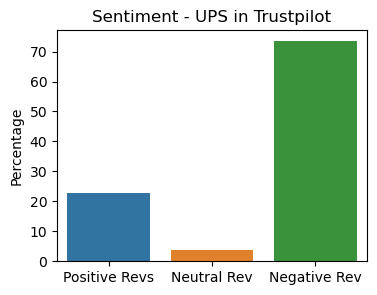

In [31]:
labels = ['Positive Revs', 'Neutral Rev', 'Negative Rev']

data = [percentage_positive_rev, 
        percentage_neutral_rev, 
        percentage_negative_rev]

plt.figure(figsize = (4, 3))

sns.barplot(x=labels, y=data)
plt.ylabel('Percentage')
plt.title('Sentiment - UPS in Trustpilot')
plt.show()

In [32]:
# Top 3 best reviews
df.sort_values(by = 'Sentiment', ascending = False).head(3)

Reviews  \
3324                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ups is absolutely horrible bad tracking finding help from their customer service is disaster\nno one is able to tell you the exact status of your package\nthey keeps on updating rotating the same information on the tracking reference and as anyone can see after  weeks of my package being at ups uk they keeps on saying the same things\ni contacted them everyday as a sender but unfortunately they were not able to give me details about my package\nthe receiver also contacted ups uk and they requested more details about the items hence information about all items was provided but nothing change\n\nyou can see that they repeatedly update the tracking number with the same information as you can see below\n\n\n on the way\nups initiated contact with the sender to obtain clearance information once received ups will submit for clearance\nstanford le hope united kingdom\n\n ups has received the information needed to submit your parcel for clearance\n\n ups initiated contact with receiver or importer for clearance information once received ups will submit for clearance\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n your parcel is prepared for clearance\n\n ups initiated contact with receiver or importer for clearance information once received ups will submit for clearance\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n ups has received the information needed to submit your parcel for clearance\n\n ups is preparing your parcel for clearance we will notify you if additional information is needed\n\n import scan\nstanford le hope united kingdom\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n your parcel is on the way\n\n warehouse scan\nstanford le hope united kingdom\n\n import scan\nstanford le hope united kingdom\n\n arrived at facility\nstanford le hope united kingdom\n\n departed from facility\nherneboernig germany\n\n arrived at facility\nherneboernig germany\n\n departed from facility\ndobra strykow poland\n\n export scan\ndobra strykow poland\n\n ups has received the information needed to submit your parcel for clearance\n\n warehouse scan\ndobra strykow poland\n\n ups has received the information needed to submit your parcel for clearance\n\n warehouse scan\ndobra strykow poland\n\n ups initiated contact with receiver or importer for clearance information once received ups will submit for clearance\n\n your parcel is on the way\n\n your parcel is on the way\n\n warehouse

In [33]:
# Top 3 worst reviews
df.sort_values(by = 'Sentiment', ascending = False).tail(3)

,Reviews,Source,Sentiment,Topic
2384,as a past employee i feel like i have a unique perspective on this subject and would like to contribute so here goes the first thing its important to address is that this company could not care less about you im not saying that in the normal i couldnt care less saying kind of way they legitimately wouldnt flinch if you died receiving one of their packages\n\nfor clarity i used to work there they know that workers are unionized and do whatever they can to operate on the edges of that have specific days you need off for a funeral jokes on you enjoy using sick time and then getting a company disciplinary meeting for using less than your allotted sick days they will literally punish you for utilizing the very basics of your union contract but anyways im getting distracted by talking about their operations in a country with labor laws lets chat about the help lines these lines are outsourced mostly to women in hot crowded loud spaces mostly in india and pakistan who are forced to pretend they are american customer service reps they also have a script if you call asking about a package youre expecting that day theyre trained to guarantee that package will be delivered if its not who cares some other under paid lady gets screamed at not anyone important these poor women and probably men are getting verbally abused for cents on the dollar not only that but most often these poor people sound so tired and broken you know this isnt the first time theyve had this exact call its so sad\n\nnow lets talk about what happens when you make that call the majority of the work done for ups happens from am till around am these employees known as the sunset shift are the lifeblood of ups and most often the people who are in their first years with the company once that call is placed the customer service rep record it and passes the details on those details go to a higher up in the us that person relays those details to a coordinator coordinators are non unionized people who for some reason oversee the operation of unionized workers they are spiteful mean and angry because they dont get the perks they pass the info to a supervisor the last person on the chain of non union people and those people then punish the workers for circumstances beyond their control all because ups loves to lie and make promises they cant keep\n\nthis company is a joke and violates work laws daily if you have a choice avoid them,Trustpilot,-0.9943,2
2057,if you made it here please do yourself a favor and avoid at all cost i read the previous reviews and i thought people were just unlucky but it was beyond my imagination i was going to have such a terrible service\n\n missing information in their website you get an estimation in their website then they say that in the case of individuals you need to drop the shipment in their main warehouse in mascot they cant pick it up from your personal address\n poor customer service you get to their office in mascot and they communicate its in a different location once you get there they say you have to be back to their office in mascot\n misleading quote this was the main reason why i picked ups the quote i got online was cheaper than the rest of competitors what a mistake after dropping my stuff in the warehouse boxes kg they said they would give me a call to confirm the price this was my last week before relocating overseas finally the day before jumping on that plane i got that call saying the amount was in their website i got it for \n damaging the delivery well maybe they have a terrible website and customer service but when it comes to their business shipping they should know their stuff right wrong they waterdamaged out of boxes my personal belongings came in different boxes to the heavyduty ones i supplied content was very damaged i had to throw away around books because they were all wet had to run or laundries for the same reason all my clothes in the boxes were wet they also lost some small

In [34]:
df_trustpilot = df

### From Reddit:

In [35]:
# Load the dataset
df = pd.read_csv("Reviews_reddit_UPS.csv")
df["Source"] = "Reddit"
df = df.dropna()
df.head(3)

,Reviews,Source
0,This has said this for about a day how much longer till delivered I thought it was one day ups shipping,Reddit
1,Anyone fired for use of Cannabis?,Reddit
2,Paying custom fees on an item that is being returned?,Reddit


In [36]:
# Applying preprocessing to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(preprocess_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Applying TF-IDF vectorization
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df['Reviews'])

# Performing topic modeling using LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Finding dominant topic for each review
dominant_topic = lda_matrix.argmax(axis=1)
df['Topic'] = dominant_topic

df.sample(3)

,Reviews,Source,Sentiment,Topic
30,does anyone work at the portland terminal or nearby,Reddit,0.000,0
240,possible fraudscamphishing by an unknown company using ups,Reddit,0.000,0
786,package went missing and ups tracking shows a claim has been issued,Reddit,-0.296,1


In [37]:
# Complaint analysis
negative_reviews = df[df['Sentiment'] < 0]
complaints = negative_reviews[['Reviews','Sentiment']]
complaints.sample(3)

,Reviews,Sentiment
523,fire at ups in lakewood nj,-0.3400
452,lost package,-0.3182
560,heard you all might go on strike,-0.1280


In [38]:
# Customer service analysis
customer_service_reviews = df[df['Reviews'].str.contains('service', case=False)]

# User experience analysis
waiting_time_reviews = df[df['Reviews'].str.contains('wait', case=False)]
convenience_reviews = df[df['Reviews'].str.contains('convenient', case=False)]
damages_reviews = df[df['Reviews'].str.contains('damage', case=False)]

In [39]:
customer_service_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
621,anyone have the answer key for the hours of service knowledge check quiz,Reddit,0.0000,0
351,trying to find data on cep courier express and parcel services fraud,Reddit,-0.5859,2
497,worst customer service in the history of commerce,Reddit,-0.6249,2


In [40]:
waiting_time_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
729,my package was shipped according to nintendo but on the ups app it still says that the package is waiting for ups to collect it,Reddit,0.0000,0
402,am i not able to go to an access point and just pick up my package rather than waiting,Reddit,0.0000,1
888,so you mean to tell me the only reason ups hired me after waiting for a job alert for years is because they are on strike and they want scabs wtf,Reddit,-0.4215,0


In [41]:
damages_reviews.sample(3)

,Reviews,Source,Sentiment,Topic
882,damaged item,Reddit,-0.4404,1
278,small claims court for ups damage,Reddit,-0.4939,0
592,issues with submitting a damaged in transit claim,Reddit,-0.4404,1


In [42]:
avg_overall_sent     = df['Sentiment'].mean()
avg_complaint_sent   = complaints['Sentiment'].mean()
avg_customer_sent    = customer_service_reviews['Sentiment'].mean()
avg_wait_sent        =  waiting_time_reviews['Sentiment'].mean()
avg_convenience_sent = convenience_reviews['Sentiment'].mean()
avg_damage_sent      = damages_reviews['Sentiment'].mean()

# Output
print(f"Overall Sentiment: { avg_overall_sent : .4f}")
print(f"Complaints: { avg_complaint_sent : .4f}")
print(f"Customer Service Reviews: { avg_customer_sent : .4f}")
print(f"Waiting Time Reviews: { avg_wait_sent : .4f}")
print(f"Convenience Reviews: { avg_convenience_sent : .4f}")
print(f"Damages Reviews: { avg_damage_sent : .4f}")

Overall Sentiment: -0.0386
Complaints: -0.3252
Customer Service Reviews: -0.0971
Waiting Time Reviews: -0.1054
Convenience Reviews:  nan
Damages Reviews: -0.3779


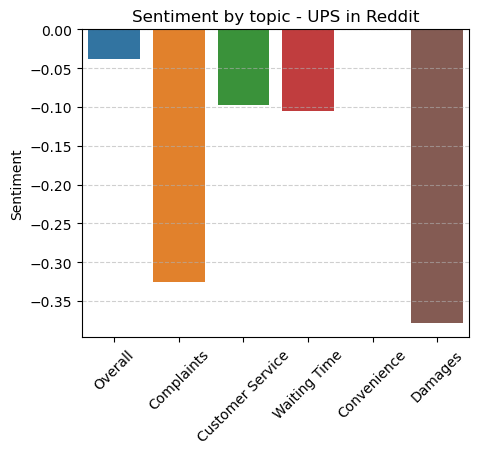

In [43]:
labels = ['Overall', 
          'Complaints', 
          'Customer Service',
          'Waiting Time',
          'Convenience',
          'Damages' 
         ]

data =  [avg_overall_sent, 
         avg_complaint_sent, 
         avg_customer_sent,
         avg_wait_sent,
         avg_convenience_sent,
         avg_damage_sent
         ]

plt.figure(figsize = (5, 4))

sns.barplot(x=labels, y=data)
plt.ylabel('Sentiment')
plt.title('Sentiment by topic - UPS in Reddit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [44]:
percentage_positive_rev = df[df['Sentiment'] > 0].shape[0] / df.shape[0] * 100
percentage_neutral_rev = df[df['Sentiment'] == 0].shape[0] / df.shape[0] * 100
percentage_negative_rev = df[df['Sentiment'] < 0].shape[0] / df.shape[0] * 100

print(f"Percentage of positive reviews: {percentage_positive_rev : .2f}%")
print(f"Percentage of neutral reviews: {percentage_neutral_rev : .2f}%")
print(f"Percentage of negative reviews: {percentage_negative_rev : .2f}%")

Percentage of positive reviews:  18.06%
Percentage of neutral reviews:  51.39%
Percentage of negative reviews:  30.56%


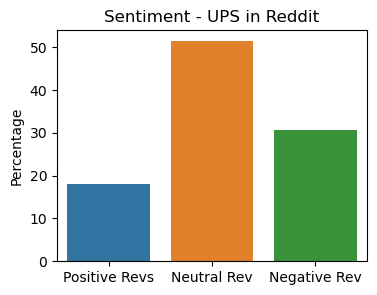

In [45]:
labels = ['Positive Revs', 'Neutral Rev', 'Negative Rev']

data = [percentage_positive_rev, 
        percentage_neutral_rev, 
        percentage_negative_rev]

plt.figure(figsize = (4, 3))

sns.barplot(x=labels, y=data)
plt.ylabel('Percentage')
plt.title('Sentiment - UPS in Reddit')
plt.show()

In [46]:
# Top 3 best reviews
df.sort_values(by = 'Sentiment', ascending = False).head(3)

,Reviews,Source,Sentiment,Topic
415,best position for label is there a best spot for a label on a x x box,Reddit,0.8555,2
78,best solution,Reddit,0.7579,2
456,join the live chat mmi showing love to teamsters workers of the world unite,Reddit,0.7506,1


In [47]:
# Top 3 worst reviews
df.sort_values(by = 'Sentiment', ascending = False).tail(3)

,Reviews,Source,Sentiment,Topic
803,paid for overnight from fl to az tracking is saying weather delay in louisville there is no weather i can see that is happening wtf,Reddit,-0.8074,0
870,what the hell is wrong with my choice,Reddit,-0.8271,1
439,ups lost two of my packages first my balenciaga shoes was lost now my dolce and gabbana shirt everything i buy expensive clothes from somewhere and they send it through ups its get lost i think someone is stealing my stuff,Reddit,-0.8625,2


In [48]:
df_reddit = df

In [49]:
df = pd.concat([df_google, df_trustpilot, df_reddit], ignore_index = True)

In [50]:
df.to_csv('UPS consolidated.csv', index = False)